# Data visualization

In [36]:
%matplotlib inline
import plotnine as p9
import pandas as pd

In [37]:
import warnings
warnings.simplefilter("ignore")

In [38]:
# read in filtered datasets
birth_reduced = pd.read_csv('../data/birth_reduced.csv')
smoke_complete = pd.read_csv('../data/smoke_complete.csv')

## create a simple ggplot

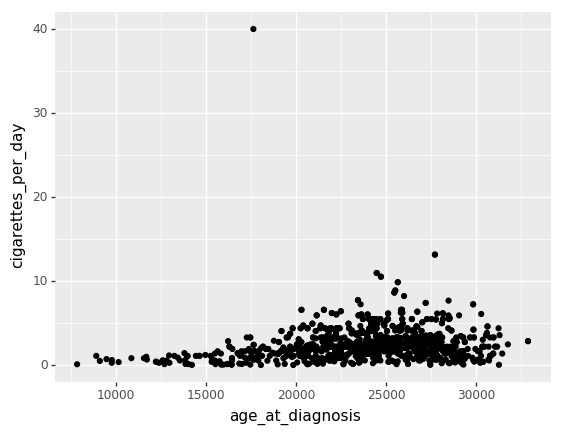

<ggplot: (7541605594)>

In [39]:
# bind data to new plot
# specify aesthetic: mapping data to plot
# layers: ways (shapes) through which data are represented
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'))
    + p9.geom_point()
    )

In [40]:
# Create object to hold plot framework
smoke_plot = p9.ggplot(data=smoke_complete,
                         mapping=p9.aes(x='age_at_diagnosis', y='cigarettes_per_day'))

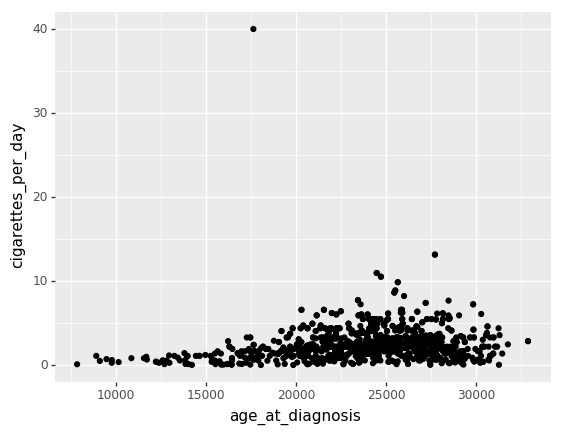

<ggplot: (-9223372029297837852)>

In [41]:
# Draw the plot
smoke_plot + p9.geom_point()

## building plots iteratively

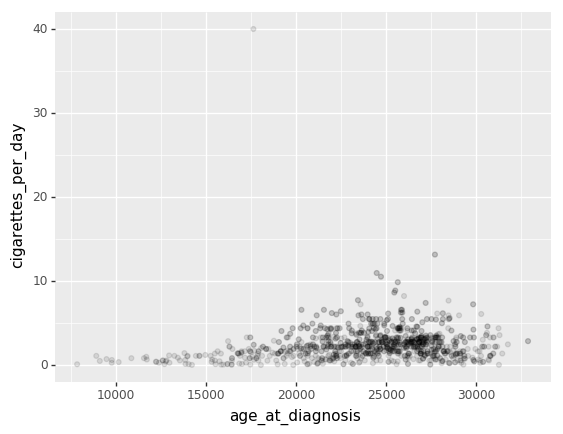

<ggplot: (-9223372029313108757)>

In [42]:
# add transparency
smoke_plot + p9.geom_point(alpha=0.1)

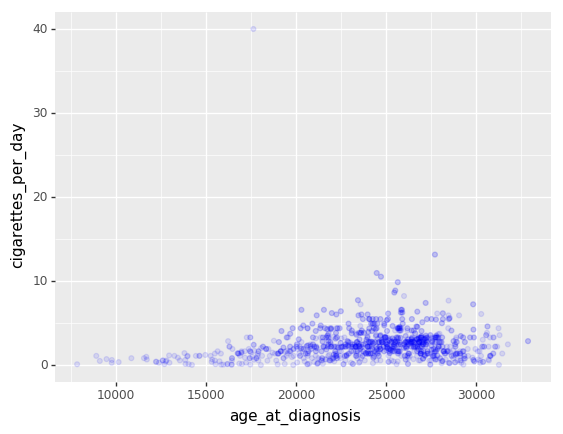

<ggplot: (-9223372029297716315)>

In [43]:
# color points blue
smoke_plot + p9.geom_point(alpha=0.1, color='blue')

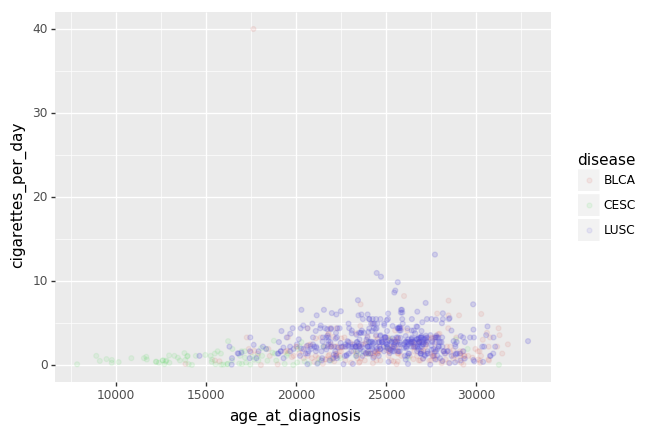

<ggplot: (7541830506)>

In [44]:
# color points by disease
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    )

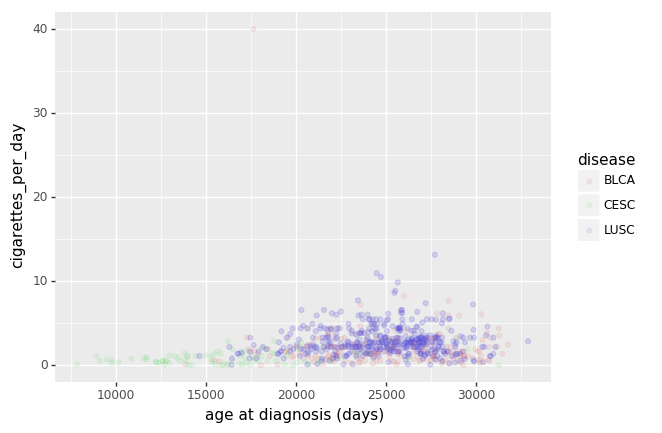

<ggplot: (7557247622)>

In [45]:
# add x axis label
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("age at diagnosis (days)")
    )

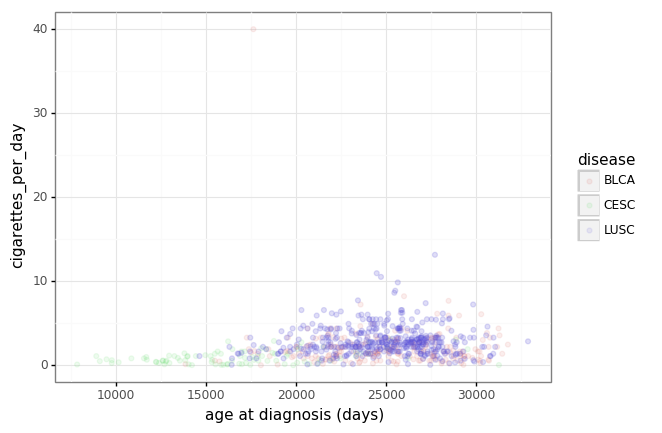

<ggplot: (-9223372029297587645)>

In [46]:
# change background theme
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("age at diagnosis (days)")
    + p9.theme_bw()
    )

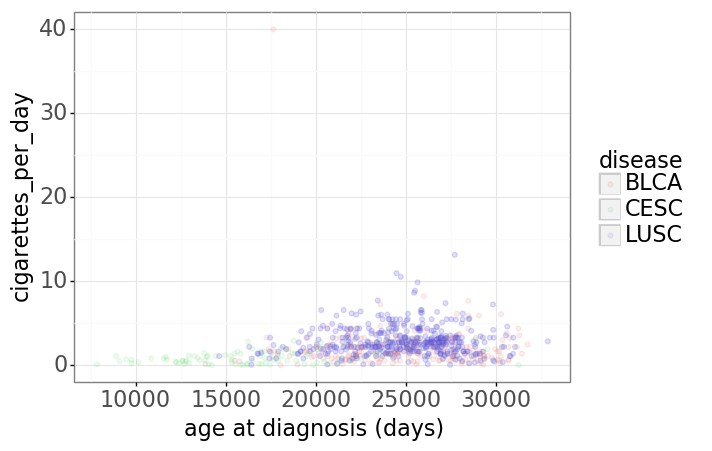

<ggplot: (-9223372029297408915)>

In [47]:
# change font size
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("age at diagnosis (days)")
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
    )

In [48]:
## Challenge: create a scatterplot from smoke_complete showing
# age at diagnosis vs years smoked with points colored by gender
# and appropriate axis labels

## Plotting distributions

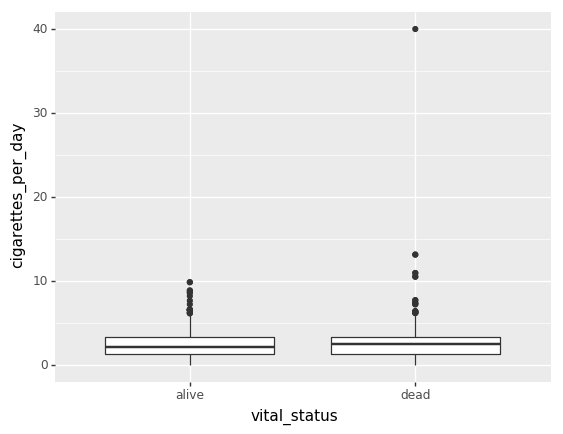

<ggplot: (7541809051)>

In [49]:
# plotting distributions
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    + p9.geom_boxplot()
    )

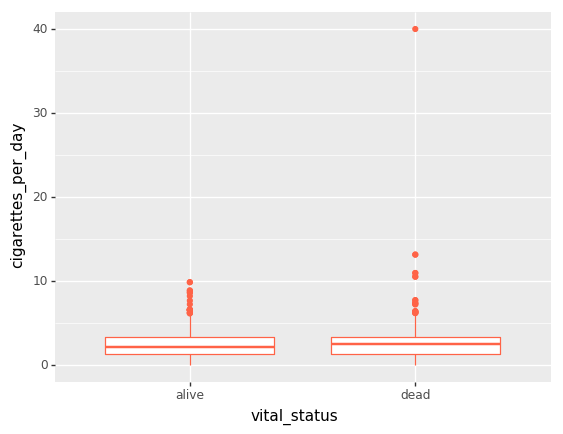

<ggplot: (7554703045)>

In [50]:
# change color of boxes
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    + p9.geom_boxplot(color="tomato")
    )

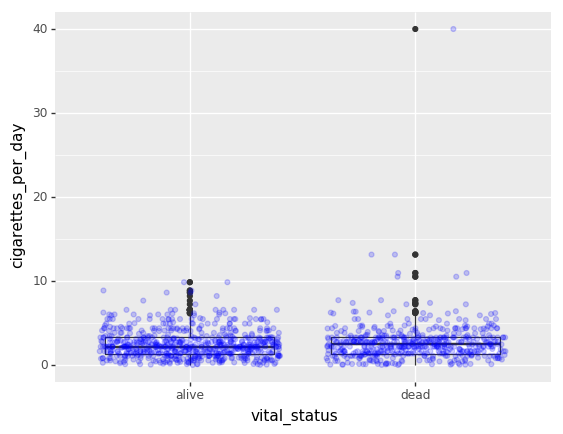

<ggplot: (-9223372029312886910)>

In [51]:
# adding colored points to black box and whisker plot
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    + p9.geom_boxplot()
    + p9.geom_jitter(alpha=0.2, color="blue")
    )

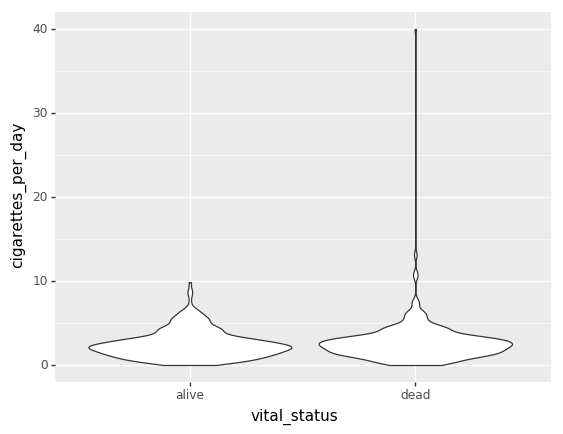

<ggplot: (-9223372029312515580)>

In [52]:
## Challenge: visualize the same data as a violin plot in a color of your choice
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='vital_status',
                          y='cigarettes_per_day'))
    + p9.geom_violin()
    )

## Plotting time series data

In [53]:
# group and count vital status by year of birth
yearly_counts = birth_reduced.groupby(['year_of_birth', 'vital_status'])['vital_status'].count()
yearly_counts # both year and vital status are row indexes

year_of_birth  vital_status
1902.0         dead             1
1909.0         dead             1
1910.0         dead             1
1912.0         dead             1
1913.0         dead             3
1914.0         dead             2
1915.0         dead             3
1916.0         dead             2
1917.0         dead             3
1918.0         alive            2
               dead             7
1919.0         alive            1
               dead             5
1920.0         alive            5
               dead             7
1921.0         alive            2
               dead            20
1922.0         alive            7
               dead            10
1923.0         alive            5
               dead             8
1924.0         alive           12
               dead            20
1925.0         alive           10
               dead            24
1926.0         alive           15
               dead            13
1927.0         alive           21
               dead 

In [54]:
# reset the index to use both as column variables
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year_of_birth,vital_status,counts
0,1902.0,dead,1
1,1909.0,dead,1
2,1910.0,dead,1
3,1912.0,dead,1
4,1913.0,dead,3
5,1914.0,dead,2
6,1915.0,dead,3
7,1916.0,dead,2
8,1917.0,dead,3
9,1918.0,alive,2


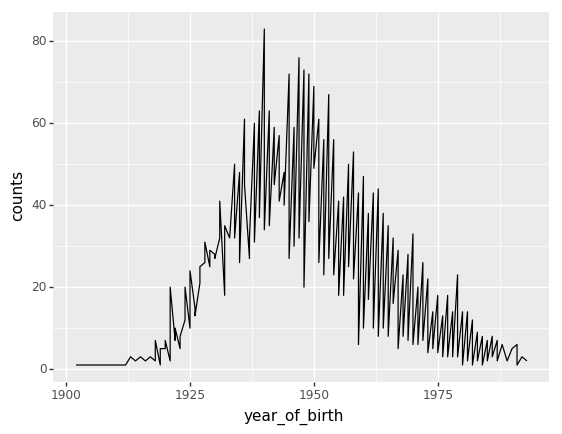

<ggplot: (-9223372029299176886)>

In [55]:
# create line plot
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year_of_birth',
                          y='counts'))
    + p9.geom_line()
    )

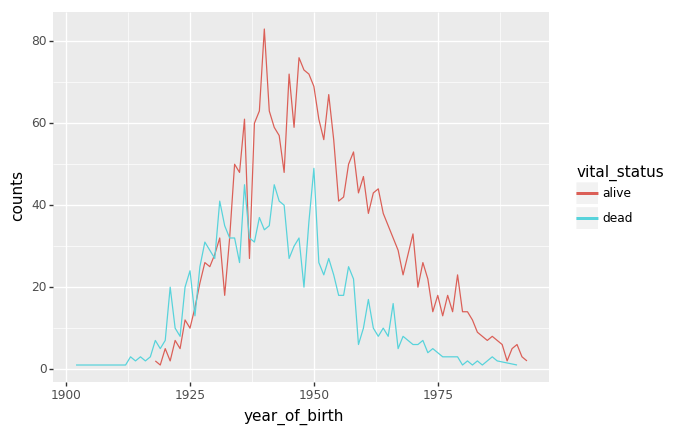

<ggplot: (7555602331)>

In [56]:
# map vital status to color, which plots a line each for alive and dead
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year_of_birth',
                          y='counts',
                          color='vital_status'))
    + p9.geom_line()
    )

In [57]:
## Challenge: create a plot of birth year and number of patients with
# two lines representing the number of patients of each gender

## Faceting

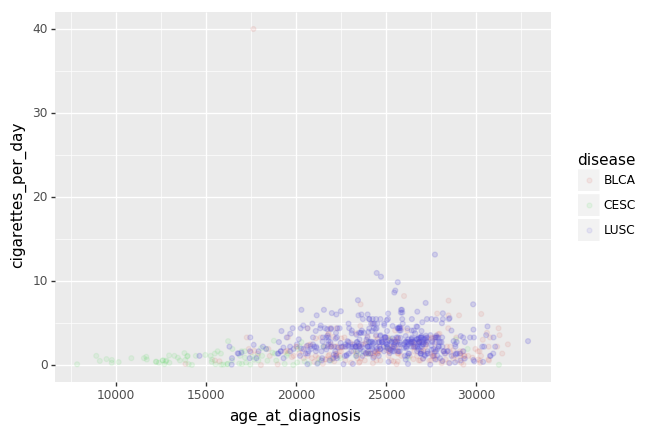

<ggplot: (7541648157)>

In [58]:
# recall previous scatterplot
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    )

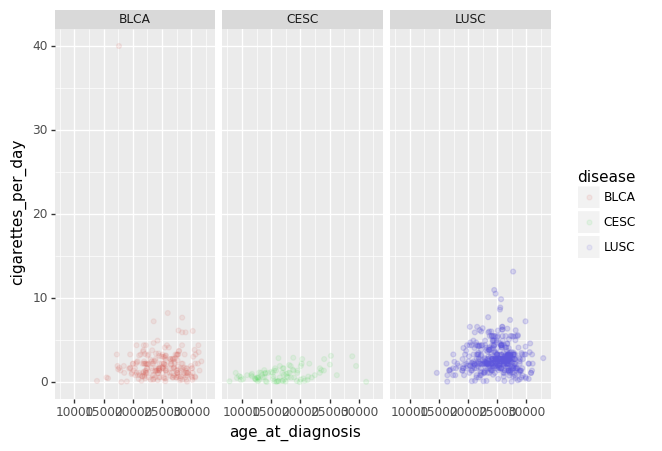

<ggplot: (7555286932)>

In [59]:
# separate panels for each disease
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("disease")
    )

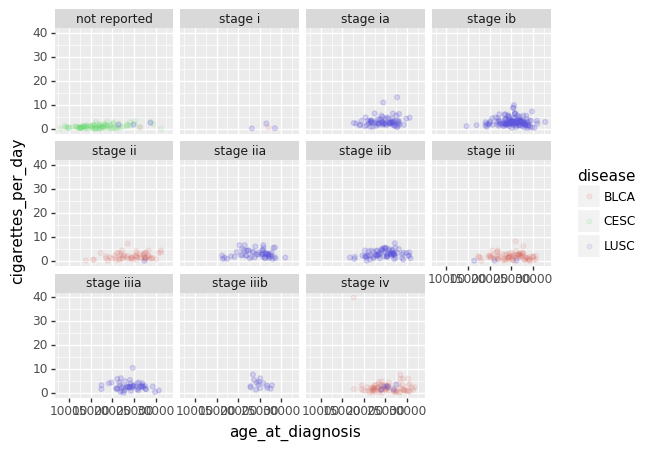

<ggplot: (7554690459)>

In [60]:
# separate graph for each tumor stage
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("tumor_stage")
    )

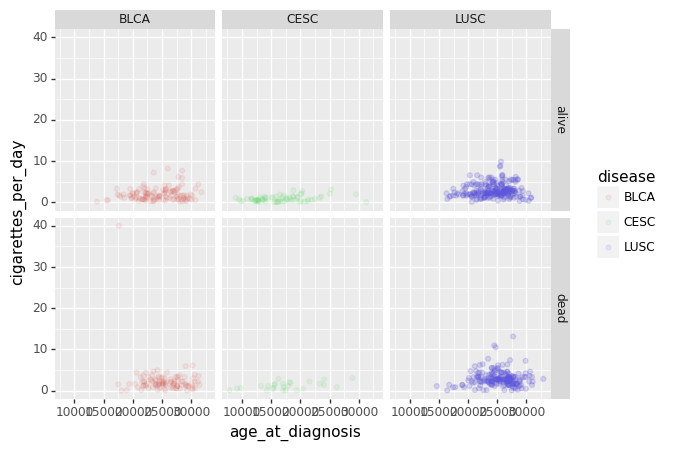

<ggplot: (-9223372029312323363)>

In [61]:
# arrange plots via a formula: vital status in rows, disease in columns
(p9.ggplot(data=smoke_complete,
        mapping=p9.aes(x='age_at_diagnosis',
        y='cigarettes_per_day',
        color = 'disease'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("vital_status ~ disease")
    )

In [62]:
## Challenge: alter your last challenge plot of (birth year by number of patients)
# to show each gender in separate panels

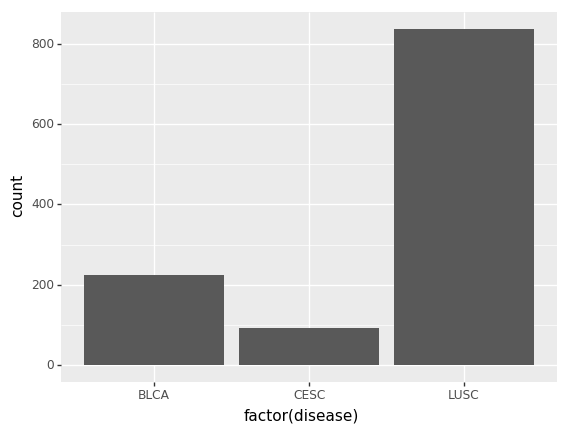

<ggplot: (-9223372029313160132)>

In [63]:
# bar plot to show disease counts
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='factor(disease)'))
    + p9.geom_bar()
    )

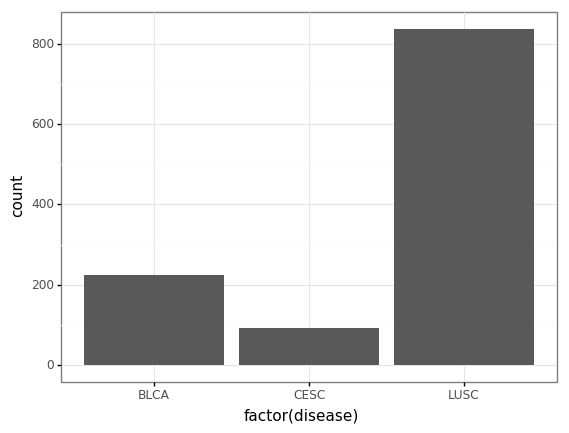

<ggplot: (7542396480)>

In [64]:
# change theme to black and white
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='factor(disease)'))
    + p9.geom_bar()
    + p9.theme_bw()
    )

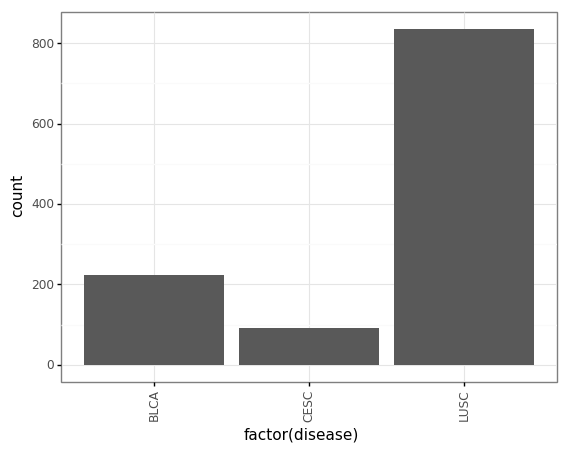

<ggplot: (-9223372029300121379)>

In [65]:
# rotate x axis labels 90 degrees
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='factor(disease)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    )

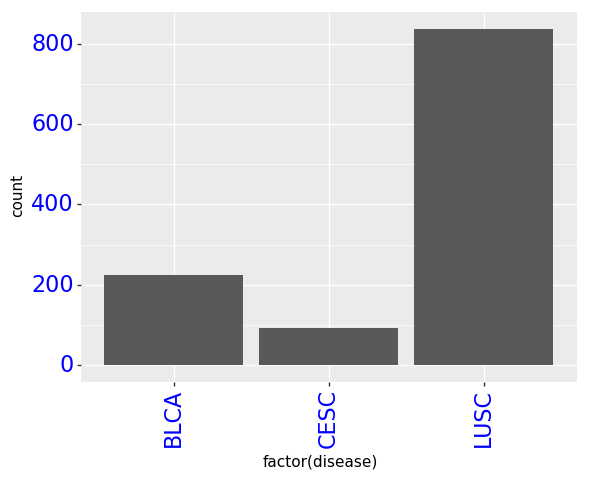

<ggplot: (-9223372029312390263)>

In [66]:
# create custom theme
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="blue", size=16,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="blue", size=16))
(p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='factor(disease)'))
    + p9.geom_bar()
    + my_custom_theme
    )

In [67]:
# save plot
my_plot = (p9.ggplot(data=smoke_complete,
           mapping=p9.aes(x='factor(disease)'))
    + p9.geom_bar()
    + my_custom_theme
    )
my_plot.save("../figures/scatterplot.png", width=10, height=10, dpi=300)

In [68]:
## Challenge: find way to change tick marks (Google search!)

In [69]:
## Challenge: improve one of the plots previously created today,
# by changing thickness of lines, name of legend, or color palette
# (http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/)